In [1]:
# import sys
# sys.path.append('..')
# import gizmo_analysis as gizmo
# import utilities as ut
# import numpy as np

# import matplotlib.pyplot as plt

from ipynb.fs.full.functions import *
%matplotlib inline

In [2]:
sim_dir = '/Users/rorik/reu/m12i'
part = gizmo.io.Read.read_snapshots(['star'], 'redshift', 0, sim_dir, 
                                    assign_hosts_rotation=True, assign_formation_coordinates=True)


# in utilities.simulation.Snapshot():
* reading:  Users/rorik/reu/m12i/snapshot_times.txt

* input redshift = 0:  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  Users/rorik/reu/m12i/output\snapdir_600\snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 70514272 particles
    dark2     (id = 2): 5513331 particles
    gas       (id = 0): 57060074 particles
    star      (id = 4): 13976485 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['star']

* reading particles from:
    output\snapdir_600\snapshot_600.0.hdf5
    output\snapdir_600\snapshot_600.1.hdf5
    output\snapdir_600\snapshot_600.2.hdf5
    output\snapdir_600\snapshot_600.3.hdf5

* reading cosmological parameters from:  Users/rorik/reu/m12i\initial_condition\ic_agora_m12i.conf

* checking sanity of particle properties


# in gizmo_analysis.gizmo_track.ParticleCoordinate():
  read 1 host

In [3]:
inds = ut.array.get_indices(part['star'].prop('host.form.distance.total')/part['star'].prop('form.scalefactor'), [0,30])
inds = ut.array.get_indices(part['star'].prop('host.distance.principal.cyl')[::,2], [-3,3], inds)
inds = ut.array.get_indices(part['star'].prop('host.distance.principal.cyl')[::,0], [0,15], inds)

ps = part['star'].prop('host.distance.principal.cyl')[inds] # in kpc
vs = part['star'].prop('host.velocity.principal.cyl')[inds] # in km/s
age = part['star'].prop('age')[inds] # in gyr

ps_form = part['star'].prop('form.host.distance.principal.cyl')[inds]
vs_form = part['star'].prop('form.host.velocity.principal.cyl')[inds]

In [4]:
R = ps[::, 0]
v_phi = vs[::, 1]
v_R = vs[::, 0]
v_z = vs[::, 2]

R_form = ps_form[::, 0]
v_phi_form = vs_form[::, 1]
v_R_form = vs_form[::, 0]
v_z_form = vs_form[::, 2]

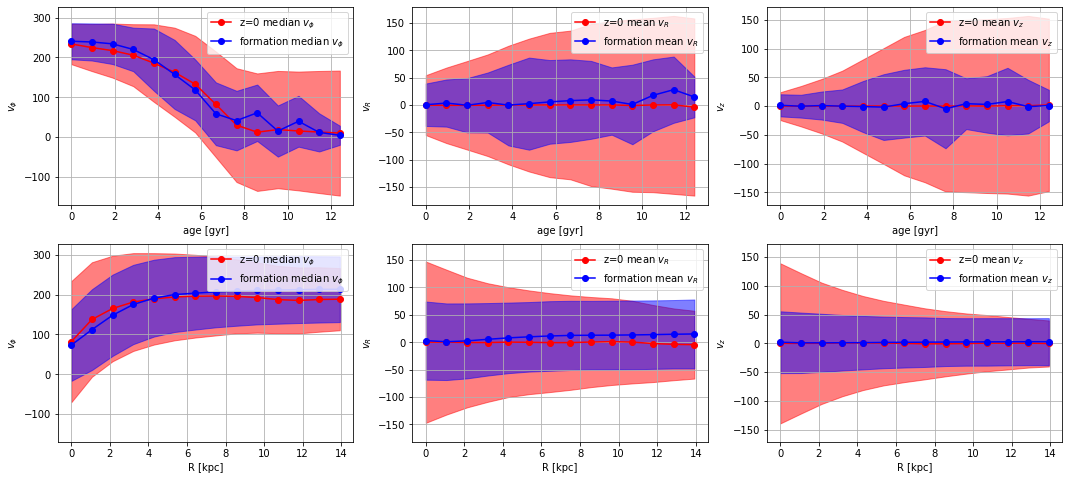

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(18, 8), sharey='col', sharex='row')

axs[0,0] = plot_helper(age, v_phi, 'z=0 median $v_{\phi}$', ax=axs[0,0], stat='median', scatter=False, c='r')
axs[0,0] = plot_helper(age, v_phi_form, 'formation median $v_{\phi}$', ax=axs[0,0], stat='median', scatter=False, c='b', grid=False)
axs[0,0].set(xlabel = 'age [gyr]', ylabel='$v_{\phi}$')

axs[0,1] = plot_helper(age, v_R, 'z=0 mean $v_R$', ax=axs[0,1], scatter=False, c='r')
axs[0,1] = plot_helper(age, v_R_form, 'formation mean $v_R$', ax=axs[0,1], scatter=False, c='b', grid=False)
axs[0,1].set(xlabel = 'age [gyr]', ylabel='$v_R$')

axs[0,2] = plot_helper(age, v_z, 'z=0 mean $v_z$', ax=axs[0,2], scatter=False, c='r')
axs[0,2] = plot_helper(age, v_z_form, 'formation mean $v_z$', ax=axs[0,2], scatter=False, c='b', grid=False)
axs[0,2].set(xlabel = 'age [gyr]', ylabel='$v_z$')

axs[1,0] = plot_helper(R, v_phi, 'z=0 median $v_{\phi}$', ax=axs[1,0], stat='median', scatter=False, c='r')
axs[1,0] = plot_helper(R, v_phi_form, 'formation median $v_{\phi}$', ax=axs[1,0], stat='median', scatter=False, c='b', grid=False)
axs[1,0].set(xlabel = 'R [kpc]', ylabel='$v_{\phi}$')

axs[1,1] = plot_helper(R, v_R, 'z=0 mean $v_R$', ax=axs[1,1], scatter=False, c='r')
axs[1,1] = plot_helper(R, v_R_form, 'formation mean $v_R$', ax=axs[1,1], scatter=False, c='b', grid=False)
axs[1,1].set(xlabel = 'R [kpc]', ylabel='$v_R$')

axs[1,2] = plot_helper(R, v_z, 'z=0 mean $v_z$', ax=axs[1,2], scatter=False, c='r')
axs[1,2] = plot_helper(R, v_z_form, 'formation mean $v_z$', ax=axs[1,2], scatter=False, c='b', grid=False)
axs[1,2].set(xlabel = 'R [kpc]', ylabel='$v_z$');

In [6]:
#specific momentum
j = (R*3.086e+16)*v_phi
j_form = (R_form*3.086e+16)*v_phi_form

#specific energy
KE = 1/2*(v_phi**2+v_R**2+v_z**2)
KE_form = 1/2*(v_phi_form**2+v_R_form**2+v_z_form**2) 

n = v_phi/((2*KE)**0.5)
n_form = v_phi_form/((2*KE_form)**0.5)

C:\Users\rorik\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\rorik\anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


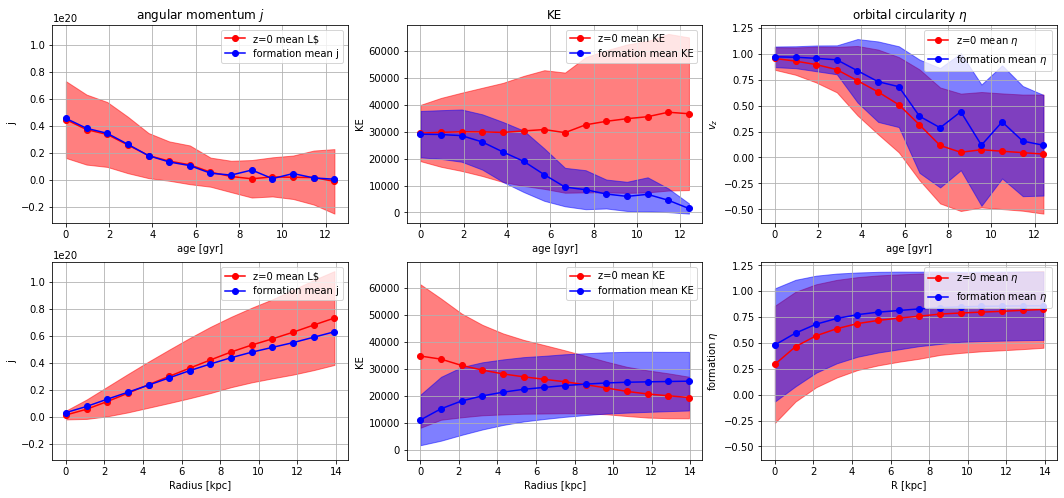

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(18, 8), sharey='col')

axs[0,0] = plot_helper(age, j, 'z=0 mean L$', ax=axs[0,0], scatter=False, c='r')
axs[0,0] = plot_helper(age, j_form, 'formation mean j', ax=axs[0,0], scatter=False, c='b', grid=False)
axs[0,0].set(xlabel = 'age [gyr]', ylabel='j', title='angular momentum $j$');

axs[0,1] = plot_helper(age, KE, 'z=0 mean KE', ax=axs[0,1], scatter=False, c='r')
axs[0,1] = plot_helper(age, KE_form, 'formation mean KE', ax=axs[0,1], scatter=False, c='b', grid=False)
axs[0,1].set(xlabel = 'age [gyr]', ylabel='KE', title='KE');

axs[1,0] = plot_helper(R, j, 'z=0 mean L$', ax=axs[1,0], scatter=False, c='r')
axs[1,0] = plot_helper(R, j_form, 'formation mean j', ax=axs[1,0], scatter=False, c='b', grid=False)
axs[1,0].set(xlabel = 'Radius [kpc]', ylabel='j');

axs[1,1] = plot_helper(R, KE, 'z=0 mean KE', ax=axs[1,1], scatter=False, c='r')
axs[1,1] = plot_helper(R, KE_form, 'formation mean KE', ax=axs[1,1], scatter=False, c='b', grid=False)
axs[1,1].set(xlabel = 'Radius [kpc]', ylabel='KE');

axs[0,2] = plot_helper(age, n, 'z=0 mean $\eta$', ax=axs[0,2], scatter=False, c='r')
axs[0,2] = plot_helper(age, n_form, 'formation mean $\eta$', ax=axs[0,2], scatter=False, c='b', grid=False)
axs[0,2].set(xlabel = 'age [gyr]', ylabel='$v_z$', title='orbital circularity $\eta$')

axs[1,2] = plot_helper(R, n, 'z=0 mean $\eta$', ax=axs[1,2], scatter=False, c='r')
axs[1,2] = plot_helper(R, n_form, 'formation mean $\eta$', ax=axs[1,2], scatter=False, c='b', grid=False)
axs[1,2].set(xlabel = 'R [kpc]', ylabel='formation $\eta$');

## specific angular momentum for R = 8 kpc

$j = Rv_{\phi}$ for star particles at sun's current pos ($R=8 \pm 1$ kpc) today

In [8]:
R8_inds = ut.array.get_indices(R, [7,9])
f_R8_inds = ut.array.get_indices(R_form, [7,9])

R8_ps = ps[R8_inds]
R8_vs = vs[R8_inds]
R8_age = age[R8_inds]
f_R8_age = age[f_R8_inds]

R8_ps_form = ps_form[R8_inds]
R8_vs_form = vs_form[R8_inds]

In [9]:
R8_j = R8_ps[::, 0]*R8_vs[::, 1]
R8_j_form = R8_ps_form[::, 0]*R8_vs_form[::, 1]
R8_n = n[R8_inds]
R8_n_form = n_form[R8_inds]

f_R8_j = ps[f_R8_inds][::, 0]*vs[f_R8_inds][::, 1]
f_R8_j_form = ps_form[f_R8_inds][::, 0]*vs_form[f_R8_inds][::, 1]
f_R8_n = n[f_R8_inds]
f_R8_n_form = n_form[f_R8_inds]

# f_R8_n = vs[f_R8_inds][::, 1]/((2*KE[f_R8_inds])**0.5)
# f_R8_n_form = vs_form[f_R8_inds][::, 1]/((2*KE_form[f_R8_inds])**0.5)

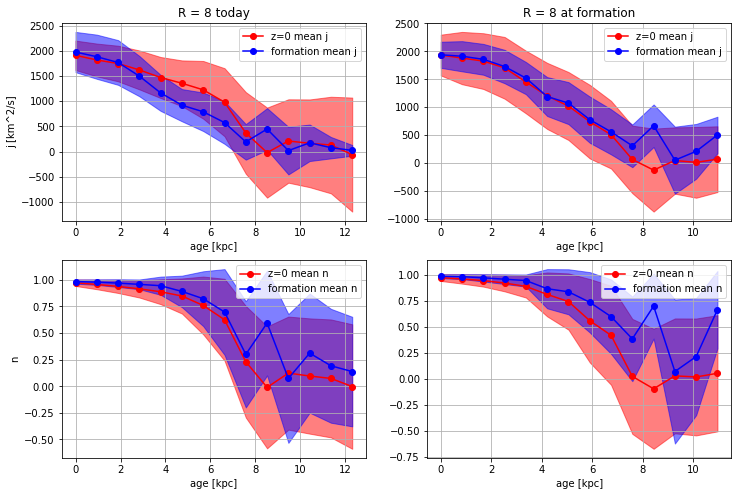

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0,0] = plot_helper(R8_age, R8_j, 'z=0 mean j', ax=ax[0,0], scatter=False, c='r')
ax[0,0] = plot_helper(R8_age, R8_j_form, 'formation mean j', ax=ax[0,0], scatter=False, c='b', grid=False)
ax[0,0].set(xlabel='age [kpc]', ylabel='j [km^2/s]', title= 'R = 8 today');

ax[0,1] = plot_helper(f_R8_age, f_R8_j, 'z=0 mean j', ax=ax[0,1], scatter=False, c='r')
ax[0,1] = plot_helper(f_R8_age, f_R8_j_form, 'formation mean j', ax=ax[0,1], scatter=False, c='b', grid=False)
ax[0,1].set(xlabel='age [kpc]', title= 'R = 8 at formation');

ax[1,0] = plot_helper(R8_age, R8_n, 'z=0 mean n', ax=ax[1,0], scatter=False, c='r')
ax[1,0] = plot_helper(R8_age, R8_n_form, 'formation mean n', ax=ax[1,0], scatter=False, c='b', grid=False)
ax[1,0].set(xlabel='age [kpc]', ylabel='n');

ax[1,1] = plot_helper(f_R8_age, f_R8_n, 'z=0 mean n', ax=ax[1,1], scatter=False, c='r')
ax[1,1] = plot_helper(f_R8_age, f_R8_n_form, 'formation mean n', ax=ax[1,1], scatter=False, c='b', grid=False)
ax[1,1].set(xlabel='age [kpc]');

In [11]:
R8_j_diff = R8_j-R8_j_form
f_R8_j_diff = f_R8_j-f_R8_j_form

R8_n_diff = R8_n-R8_n_form
f_R8_n_diff = f_R8_n-f_R8_n_form

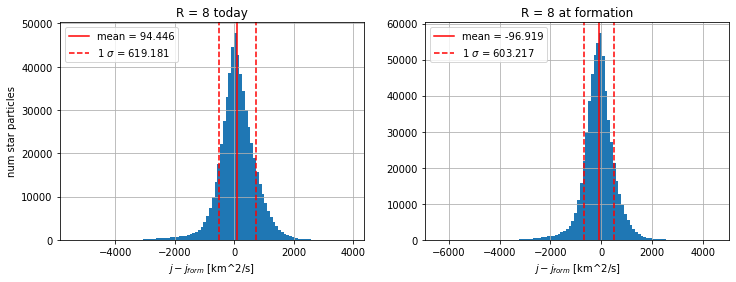

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].hist(R8_j_diff, bins=100)
ax[0].set(xlabel='$j-j_{form}$ [km^2/s]', ylabel='num star particles', title= 'R = 8 today')
ax[0] = plot_hist_stats(R8_j_diff, ax=ax[0])
ax[0].grid()

ax[1].hist(f_R8_j_diff, bins=100)
ax[1].set(xlabel='$j-j_{form}$ [km^2/s]', title= 'R = 8 at formation')
ax[1] = plot_hist_stats(f_R8_j_diff, ax=ax[1])
ax[1].grid();

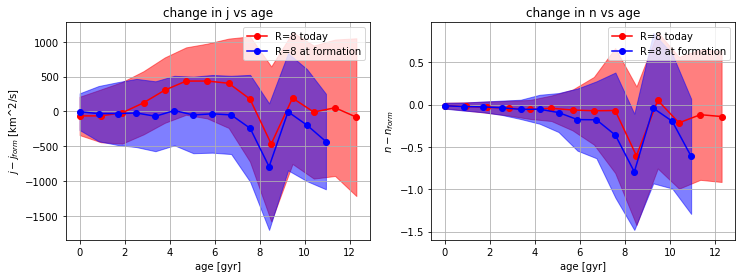

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0] = plot_helper(R8_age, R8_j_diff, 'R=8 today', ax=ax[0], scatter=False, c='r')
ax[0] = plot_helper(f_R8_age, f_R8_j_diff, 'R=8 at formation', ax=ax[0], scatter=False, c='b')
ax[0].set(xlabel = 'age [gyr]', ylabel = '$j-j_{form}$ [km^2/s]', title='change in j vs age')
ax[0].grid()

ax[1] = plot_helper(R8_age, R8_n_diff, 'R=8 today', ax=ax[1], scatter=False, c='r')
ax[1] = plot_helper(f_R8_age, f_R8_n_diff, 'R=8 at formation', ax=ax[1], scatter=False, c='b')
ax[1].set(xlabel = 'age [gyr]', ylabel = '$n-n_{form}$', title='change in n vs age')
ax[1].grid();

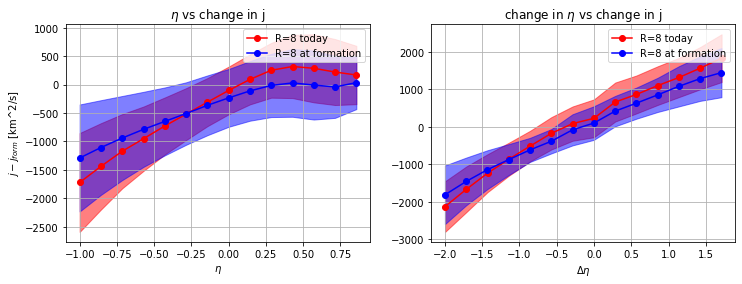

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0] = plot_helper(R8_n, R8_j_diff, 'R=8 today', ax=ax[0], scatter=False, c='r')
ax[0] = plot_helper(f_R8_n, f_R8_j_diff, 'R=8 at formation', ax=ax[0], scatter=False, c='b')
ax[0].set(xlabel = '$\eta$', ylabel = '$j-j_{form}$ [km^2/s]', title='$\eta$ vs change in j')
ax[0].grid()

ax[1] = plot_helper(R8_n_diff, R8_j_diff, 'R=8 today', ax=ax[1], scatter=False, c='r')
ax[1] = plot_helper(f_R8_n_diff, f_R8_j_diff, 'R=8 at formation', ax=ax[1], scatter=False, c='b')
ax[1].set(xlabel = '$\Delta\eta$', title='change in $\eta$ vs change in j')
ax[1].grid();

In [15]:
R8_vz_diff = R8_vs[::, 2]-R8_vs_form[::, 2]
R8_vR_diff = R8_vs[::, 0]-R8_vs_form[::, 0]

f_R8_vz_diff = vs[f_R8_inds][::, 2]-vs_form[f_R8_inds][::, 2]
f_R8_vR_diff = vs[f_R8_inds][::, 0]-vs_form[f_R8_inds][::, 0]

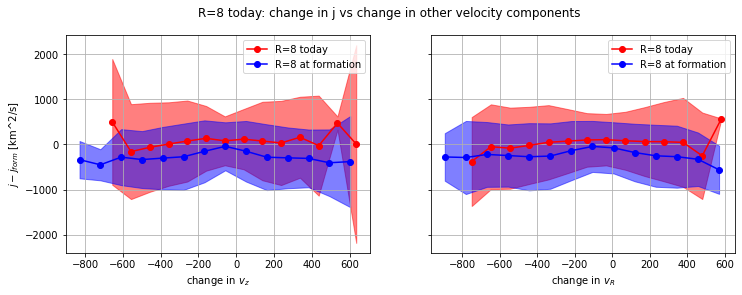

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.suptitle('R=8 today: change in j vs change in other velocity components')

axs[0] = plot_helper(R8_vz_diff, R8_j_diff, 'R=8 today', ax=axs[0])
axs[0] = plot_helper(f_R8_vz_diff, f_R8_j_diff, 'R=8 at formation', c='b', ax=axs[0])
axs[0].set(xlabel = 'change in $v_z$', ylabel = '$j-j_{form}$ [km^2/s]')
axs[0].grid()

axs[1] = plot_helper(R8_vR_diff, R8_j_diff, 'R=8 today', ax=axs[1])
axs[1] = plot_helper(f_R8_vR_diff, f_R8_j_diff, 'R=8 at formation', c='b', ax=axs[1])
axs[1].set(xlabel = 'change in $v_R$')
axs[1].grid();

In [17]:
print(f'mean R=8(at formation) vphi today: {np.mean(vs[f_R8_inds][::, 1])}')
print(f'mean R=8(at formation) vphi at formation: {np.mean(vs_form[f_R8_inds][::, 1])}')

print(f'mean tot vphi today: {np.mean(vs[::, 1])}')
print(f'mean tot vphi at formation: {np.mean(vs_form[::, 1])}')

mean R=8(at formation) vphi today: 158.8684844970703
mean R=8(at formation) vphi at formation: 165.8130340576172
mean tot vphi today: 126.4609146118164
mean tot vphi at formation: 128.0930633544922


In [18]:
v_phi_10 = 16

In [19]:
def ratio_checker(form_v_zr, delta_v_zr, inds, cutoff=0.2):
    
    # indices of stars particles formed on circular orbits
    form_inds = ut.array.get_indices(ps_form[inds][::, 2], [-0.3, 0.3]) # |z| < 300 pc
    v_tot = np.sqrt(np.square(vs_form[inds][::, 0]) + np.square(vs_form[inds][::, 2]))
    form_inds = ut.array.get_indices(v_tot, [0,form_v_zr], form_inds)  # sqrt(vR^2 + vz^2) < 20 km/s

    vz_diff = vs[inds][::, 2]-vs_form[inds][::, 2]
    vR_diff = vs[inds][::, 0]-vs_form[inds][::, 0]
    
    j = ps[inds][::, 0]*vs[inds][::, 1]
    j_form = ps_form[inds][::, 0]*vs_form[inds][::, 1]
    j_diff = (j-j_form)/j_form
    
    # indices of orbits that stay circular: sum in quadrature of change < 10 km/s 
    v_tot_change = np.sqrt(np.square(vz_diff) + np.square(vR_diff))

    non_circular_inds = ut.array.get_indices(v_tot_change, [delta_v_zr, max(v_tot_change)], form_inds) 

    cold_T_inds = ut.array.get_indices(v_tot_change, [0, delta_v_zr], form_inds)
    cold_T_inds = ut.array.get_indices(j_diff, [-5, 5], cold_T_inds)
    
    cold_T_cutoff_inds = ut.array.get_indices(abs(j_diff), [cutoff, max(abs(j_diff))], cold_T_inds)
        
    return len(cold_T_cutoff_inds)/len(non_circular_inds), j_diff[cold_T_inds]

In [20]:
def ratio_checker1(form_v_zr, current_v_zr, inds, cutoff=0.2):
    
    # indices of stars particles formed on circular orbits
    form_inds = ut.array.get_indices(ps_form[inds][::, 2], [-0.3, 0.3]) # |z| < 300 pc
    v_tot = np.sqrt(np.square(vs_form[inds][::, 0]) + np.square(vs_form[inds][::, 2]))
    form_inds = ut.array.get_indices(v_tot, [0,form_v_zr], form_inds)  # sqrt(vR^2 + vz^2) < 20 km/s

    vz_current = vs[inds][::, 2]
    vR_current = vs[inds][::, 0]
    
    j = ps[inds][::, 0]*vs[inds][::, 1]
    j_form = ps_form[inds][::, 0]*vs_form[inds][::, 1]
    j_diff = (j-j_form)/j_form
    
    # indices of orbits that stay circular: sum in quadrature of change < 10 km/s 
    v_tot_current = np.sqrt(np.square(vz_current) + np.square(vR_current))

    non_circular_inds = ut.array.get_indices(v_tot_current, [current_v_zr, max(v_tot_current)], form_inds) 

    cold_T_inds = ut.array.get_indices(v_tot_current, [0, current_v_zr], form_inds)
    cold_T_inds = ut.array.get_indices(j_diff, [-5, 5], cold_T_inds)
    
    cold_T_cutoff_inds = ut.array.get_indices(abs(j_diff), [cutoff, max(abs(j_diff))], cold_T_inds)
        
    return len(cold_T_cutoff_inds)/len(non_circular_inds), j_diff[cold_T_inds]

In [21]:
ratio, c_T_dist = ratio_checker(v_phi_10, v_phi_10, inds=R8_inds, cutoff=0.2)
print(ratio)

0.03149780711469455


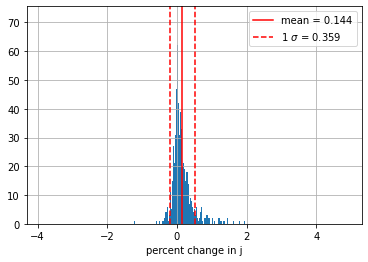

In [22]:
fig, ax = plt.subplots()

ax.hist(c_T_dist, bins=1000);
ax = plot_hist_stats(c_T_dist, numstd=1)
ax.set(xlabel='percent change in j')
ax.grid();

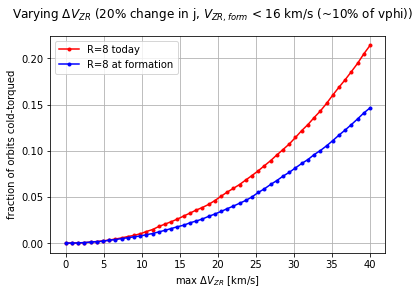

In [23]:
vcirc_change_range = np.linspace(0, 40)
R_ratio, Rform_ratio = [], []
for i in range(len(vcirc_change_range)):
    ratio, c_T_dist = ratio_checker(v_phi_10, vcirc_change_range[i], R8_inds, cutoff=0.2)
    R_ratio += [ratio]
    ratio, c_T_dist = ratio_checker(v_phi_10, vcirc_change_range[i], f_R8_inds, cutoff=0.2)
    Rform_ratio += [ratio]
    
fig, ax = plt.subplots()
fig.suptitle(f'Varying $\Delta V_{{ZR}}$ (20% change in j, $V_{{ZR, form}}$ < {v_phi_10} km/s (~10% of vphi))')
ax.plot(vcirc_change_range, R_ratio, 'r.-', label='R=8 today')
ax.plot(vcirc_change_range, Rform_ratio, '.-', c='b', label='R=8 at formation')
ax.legend()
ax.grid()
ax.set(xlabel='max $\Delta V_{ZR}$ [km/s]', ylabel='fraction of orbits cold-torqued');

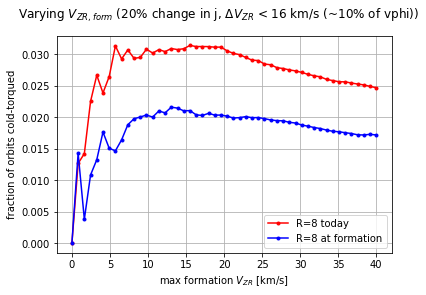

In [24]:
vcirc_form_range = np.linspace(0, 40)
R_ratio, Rform_ratio = [], []
for i in range(len(vcirc_form_range)):
    if vcirc_form_range[i]==0:
        R_ratio += [0]
        Rform_ratio += [0]
    else:
        ratio, c_T_dist = ratio_checker(vcirc_form_range[i], v_phi_10, R8_inds, cutoff=0.2)
        R_ratio += [ratio]
        ratio, c_T_dist = ratio_checker(vcirc_form_range[i], v_phi_10, f_R8_inds, cutoff=0.2)
        Rform_ratio += [ratio]
    
fig, ax = plt.subplots()
fig.suptitle(f'Varying $V_{{ZR, form}}$ (20% change in j, $\Delta V_{{ZR}}$ < {v_phi_10} km/s (~10% of vphi))')
ax.plot(vcirc_form_range, R_ratio, 'r.-', label='R=8 today')
ax.plot(vcirc_form_range, Rform_ratio, '.-', c='b', label='R=8 at formation')
ax.legend()
ax.grid()
ax.set(xlabel='max formation $V_{ZR}$ [km/s]', ylabel='fraction of orbits cold-torqued');

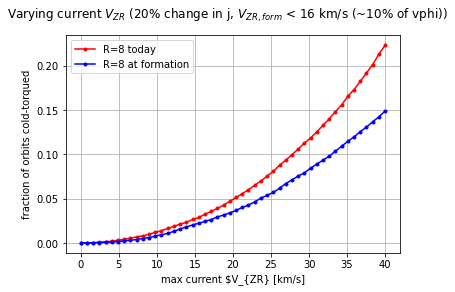

In [25]:
vcirc_current_range = np.linspace(0, 40)
R_ratio, Rform_ratio = [], []
for i in range(len(vcirc_current_range)):
    ratio, c_T_dist = ratio_checker1(v_phi_10, vcirc_current_range[i], R8_inds, cutoff=0.2)
    R_ratio += [ratio]
    ratio, c_T_dist = ratio_checker1(v_phi_10, vcirc_current_range[i], f_R8_inds, cutoff=0.2)
    Rform_ratio += [ratio]
    
fig, ax = plt.subplots()
fig.suptitle(f'Varying current $V_{{ZR}}$ (20% change in j, $V_{{ZR, form}}$ < {v_phi_10} km/s (~10% of vphi))')
ax.plot(vcirc_current_range, R_ratio, 'r.-', label='R=8 today')
ax.plot(vcirc_current_range, Rform_ratio, '.-', c='b', label='R=8 at formation')
ax.legend()
ax.grid()
ax.set(xlabel='max current $V_{ZR} [km/s]', ylabel='fraction of orbits cold-torqued');

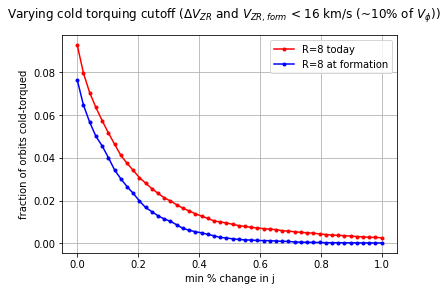

In [26]:
t_cutoff_range = np.linspace(0, 1)
R_ratio, Rform_ratio = [], []
for i in range(len(t_cutoff_range)):
    ratio, c_T_dist = ratio_checker(v_phi_10, v_phi_10, R8_inds, cutoff=t_cutoff_range[i])
    R_ratio += [ratio]
    ratio, c_T_dist = ratio_checker(v_phi_10, v_phi_10, f_R8_inds, cutoff=t_cutoff_range[i])
    Rform_ratio += [ratio]
    
fig, ax = plt.subplots()
fig.suptitle(f'Varying cold torquing cutoff ($\Delta V_{{ZR}}$ and $V_{{ZR, form}}$ < {v_phi_10} km/s (~10% of $V_{{\phi}}$))')
ax.plot(t_cutoff_range, R_ratio, 'r.-', label='R=8 today')
ax.plot(t_cutoff_range, Rform_ratio, 'b.-', label='R=8 at formation')
ax.legend()
ax.grid()
ax.set(xlabel='min % change in j', ylabel='fraction of orbits cold-torqued');

In [27]:
def ratio_checker_n(inds, n_form_cutoff, n_cutoff, j_cutoff=0.2):
    
    # indices of stars particles formed on circular orbits
    form_inds = ut.array.get_indices(ps_form[inds][::, 2], [-0.3, 0.3]) # |z| < 300 pc
    form_inds = ut.array.get_indices(n_form[inds], [n_form_cutoff, 1], form_inds)
    
    j = ps[inds][::, 0]*vs[inds][::, 1]
    j_form = ps_form[inds][::, 0]*vs_form[inds][::, 1]
    j_diff = (j-j_form)/j_form
    
    # indices of orbits that stay circular

    non_circular_inds = ut.array.get_indices(n[inds], [0, n_cutoff], form_inds)
    
    cold_T_inds = ut.array.get_indices(n[inds], [n_cutoff, 1], form_inds)
#     cold_T_inds = ut.array.get_indices(j_diff, [-5, 5], cold_T_inds)
    
    cold_T_cutoff_inds = ut.array.get_indices(abs(j_diff), [j_cutoff, max(abs(j_diff))], cold_T_inds)
        
    return len(cold_T_cutoff_inds)/len(non_circular_inds), j_diff[cold_T_inds]

1.4840113952818412


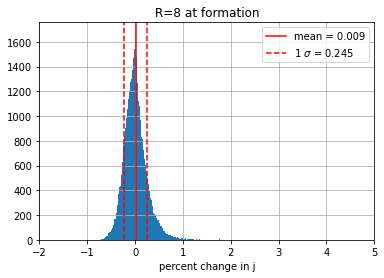

In [34]:
ratio, c_T_dist = ratio_checker_n(f_R8_inds, 0.9, 0.9, 0.2)
print(ratio)

fig, ax = plt.subplots()
ax.hist(c_T_dist, bins=1000);
ax = plot_hist_stats(c_T_dist, numstd=1)
ax.set(xlabel='percent change in j', xlim=[-2, 5], title='R=8 at formation')
ax.grid();

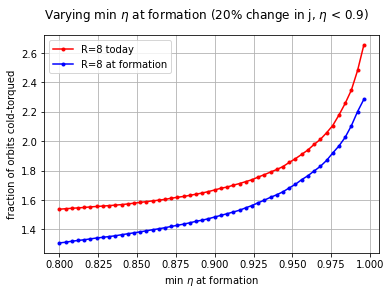

In [37]:
n_form_range = np.linspace(0.8, 1, endpoint=False)
R_ratio, Rform_ratio = [], []
for i in range(len(n_form_range)):
    ratio, c_T_dist = ratio_checker_n(R8_inds, n_form_range[i], 0.9, 0.2)
    R_ratio += [ratio]
    ratio, c_T_dist = ratio_checker_n(f_R8_inds, n_form_range[i], 0.9, 0.2)
    Rform_ratio += [ratio]
    
fig, ax = plt.subplots()
fig.suptitle('Varying min $\eta$ at formation (20% change in j, $\eta$ < 0.9)')
ax.plot(n_form_range, R_ratio, 'r.-', label='R=8 today')
ax.plot(n_form_range, Rform_ratio, '.-', c='b', label='R=8 at formation')
ax.set(xlabel='min $\eta$ at formation', ylabel='fraction of orbits cold-torqued')
ax.legend()
ax.grid();

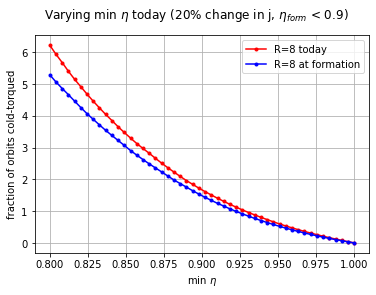

In [38]:
n_range = np.linspace(0.8, 1)
R_ratio, Rform_ratio = [], []
for i in range(len(n_form_range)):
    ratio, c_T_dist = ratio_checker_n(R8_inds, 0.9, n_range[i], 0.2)
    R_ratio += [ratio]
    ratio, c_T_dist = ratio_checker_n(f_R8_inds, 0.9, n_range[i], 0.2)
    Rform_ratio += [ratio]
    
fig, ax = plt.subplots()
fig.suptitle('Varying min $\eta$ today (20% change in j, $\eta_{form}$ < 0.9)')
ax.plot(n_range, R_ratio, 'r.-', label='R=8 today')
ax.plot(n_range, Rform_ratio, '.-', c='b', label='R=8 at formation')
ax.set(xlabel='min $\eta$', ylabel='fraction of orbits cold-torqued')
ax.legend()
ax.grid();

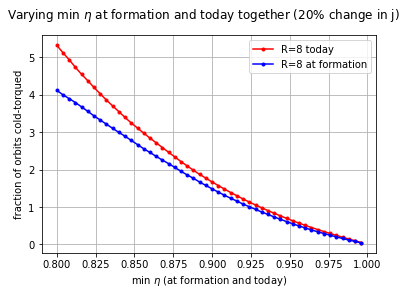

In [39]:
n_range = np.linspace(0.8, 1, endpoint=False)
R_ratio, Rform_ratio = [], []
for i in range(len(n_form_range)):
    ratio, c_T_dist = ratio_checker_n(R8_inds, n_range[i], n_range[i], 0.2)
    R_ratio += [ratio]
    ratio, c_T_dist = ratio_checker_n(f_R8_inds, n_range[i], n_range[i], 0.2)
    Rform_ratio += [ratio]
    
fig, ax = plt.subplots()
fig.suptitle('Varying min $\eta$ at formation and today together (20% change in j)')
ax.plot(n_range, R_ratio, 'r.-', label='R=8 today')
ax.plot(n_range, Rform_ratio, '.-', c='b', label='R=8 at formation')
ax.set(xlabel='min $\eta$ (at formation and today)', ylabel='fraction of orbits cold-torqued')
ax.legend()
ax.grid();

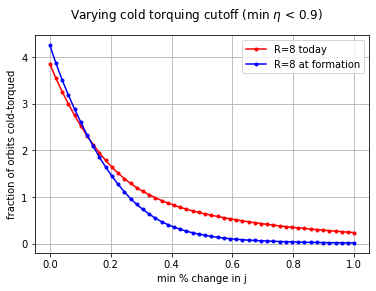

In [40]:
t_cutoff_range = np.linspace(0, 1)
R_ratio, Rform_ratio = [], []
for i in range(len(n_form_range)):
    ratio, c_T_dist = ratio_checker_n(R8_inds, 0.9, 0.9, t_cutoff_range[i])
    R_ratio += [ratio]
    ratio, c_T_dist = ratio_checker_n(f_R8_inds, 0.9, 0.9, t_cutoff_range[i])
    Rform_ratio += [ratio]
    
fig, ax = plt.subplots()
fig.suptitle('Varying cold torquing cutoff (min $\eta$ < 0.9)')
ax.plot(t_cutoff_range, R_ratio, 'r.-', label='R=8 today')
ax.plot(t_cutoff_range, Rform_ratio, '.-', c='b', label='R=8 at formation')
ax.set(xlabel='min % change in j', ylabel='fraction of orbits cold-torqued')
ax.legend()
ax.grid();

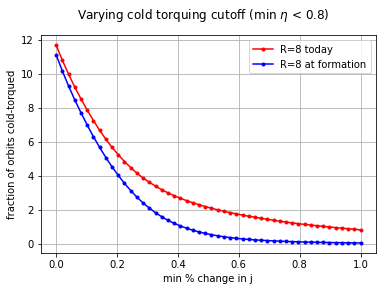

In [33]:
t_cutoff_range = np.linspace(0, 1)
R_ratio, Rform_ratio = [], []
for i in range(len(n_form_range)):
    ratio, c_T_dist = ratio_checker_n(R8_inds, 0.95, 0.95, t_cutoff_range[i])
    R_ratio += [ratio]
    ratio, c_T_dist = ratio_checker_n(f_R8_inds, 0.95, 0.95, t_cutoff_range[i])
    Rform_ratio += [ratio]
    
fig, ax = plt.subplots()
fig.suptitle('Varying cold torquing cutoff (min $\eta$ < 0.95)')
ax.plot(t_cutoff_range, R_ratio, 'r.-', label='R=8 today')
ax.plot(t_cutoff_range, Rform_ratio, '.-', c='b', label='R=8 at formation')
ax.set(xlabel='min % change in j', ylabel='fraction of orbits cold-torqued')
ax.legend()
ax.grid();